In [22]:
#Initially loading few Libraries 

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
df=pd.read_csv('Data/DenguDisease-1.csv')

In [24]:
df.head()


,Temperature,Humidity,Precipitation,Cases
0,28.68,88.81,15.46,6
1,28.41,88.81,13.69,186
2,27.83,89.25,7.07,267
3,25.58,85.62,4.42,248
4,22.49,80.06,0.87,0


In [25]:
x = np.median(df["Cases"])
x

496.5

In [26]:
df["Cases"]=np.where(df["Cases"]<495, "0", "1")
df.head()

,Temperature,Humidity,Precipitation,Cases
0,28.68,88.81,15.46,0
1,28.41,88.81,13.69,0
2,27.83,89.25,7.07,0
3,25.58,85.62,4.42,0
4,22.49,80.06,0.87,0


In [27]:
y = df['Cases']
X = df.drop(['Cases'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=SEED)

In [29]:
len(X)       
len(X_train) 
len(X_test) 

42

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))

0.6190476190476191


In [35]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17  5]
 [11  9]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68        22
           1       0.64      0.45      0.53        20

    accuracy                           0.62        42
   macro avg       0.62      0.61      0.60        42
weighted avg       0.62      0.62      0.61        42



In [36]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter(action ="ignore", category=FutureWarning)

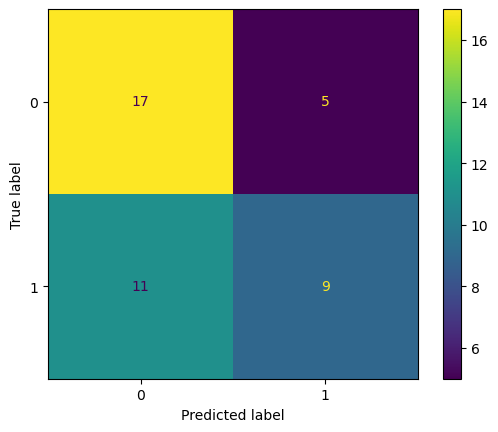

In [37]:
plot_confusion_matrix(classifier, X_test, y_test, display_labels = [0, 1] )